# Decision Tree Learning

Learning is the process of an agent improving its future performance by adapting its output based on a given percept sequence and knowledge about the world. Learning is an important tool as the perfect behavior for an agent may not be programmable. This can be due to a dynamic environment that prevents a programmer from implementing every possible action e.g. the environment of a humanoid robot or the Mars exploration rovers, which can take a step of 30cm or 20 cm etc., or a dynamic environment in which not every outcome is predictable e.g. the stock market. Three forms of learning are common when it comes to artificial intelligence, supervised learning, unsupervised learning, and reinforcement learning. These types of learning differ in the form of feedback that is available for the agent. When it comes to supervised learning both the input and output are available to the agent, reinforcement learning does not provide the output to the agent but provides feedback in the form of a reward or a punishment, and unsupervised learning does not provide any feedback. Decision Tree Learning is an inductive (supervised) form of learning where the agent learns a function based on given input-output pairs. 

## Motivation

I got an introduction to decision tree learning as part of the "Intro to AI" course in the previous semester and had seen and executed the basic algorithm by hand, I was interested in learning how it was implemented in popular modules such as scikit-kearn and gaining insight into some higher level concepts for decision trees that I hadn't been introduced to yet. 

I completed a course on Kaggle "Intro to Machine Learning" in which I was introduced to the DecisionTreeRegressor class and learned some basics of model evaluation based on data from the Iowa housing market. As I learn more, I may update this project, or add other notebooks to this repository.  



## Dependencies

This notebook uses the following. Please ensure you have Python and Java installed. I used VS code when writing down the execution instructions, so if you are not familiar with venvs kindly download it, it provides a very easy way to create them without having to use the command line. I will not rehash how to create a venv here. If you need a guide on that, please check the subsections "Setting up a venv", "What is a venv" and "Creating a venv" [here](https://github.com/Kena-Njonge/Grade_Analysis)

The dependencies will be automatically installed when you create the venv.

- [Python](https://www.python.org/) (version 3.12.2 or later)
- [Pandas](https://pandas.pydata.org/) (version 2.2.1 or later)
- [Matplotlib](https://matplotlib.org/) (version 3.8.0 or later)
- [scikit-learn](https://scikit-learn.org/stable/) (version 1.3.0 or later)
- [Ipython Kernel](https://ipython.org/) (version 6.29.3 or later)
- [Numpy](https://numpy.org/) (version 1.26.4 or later)




## Decion Trees.

Decision Trees are a simple model, one of their main advantages is their explainability as a user can clearly understand what steps were taken and what considerations there were in the generation of a certain output. They are also the basic building blocks for some more complicated models in data science e.g. random forests. Decision Trees are prone to overfitting and deep decision trees will capture noise and memorize data. 


There are two types of decision trees, classifiers and regression-based decision trees. The differentiator between the two is if the value that we want to predict, our target, and our features are all discrete or if some are continuous. Apart from this the methods for creating a model are pretty similar. The model is trained by splitting the training data based on some (discrete or continuous) attribute. We choose the attribute that maximizes respectively minimizes a target value, this could be the Gini coefficient, the Information Gain, or the Mean Squared Error. Once the training is complete, we can use our decision tree to predict future outcomes. Despite their limitations, decision trees have shown themselves to be very useful in industry. 
## The dataset

The dataset that I will use in this notebook was provided by Anaconda as part of their "Data Analysis with Excel and Python course" which I completed. The course itself was mostly focused on showing that core Excel functionality such as pivot tables, can just as easily be implemented in Python. For this we used pandas.  Kaggle is a platform that hosts competitions where data scientists and machine learning enthusiasts can compete to solve real-world problems using machine learning techniques. Additionally, they provide real-world datasets and courses to improve one's data science knowledge and skills. 

We will take a look at data on the Melbourne housing market. The following data set is a subset of the dataset created by Tony Pino. He created it by scraping data from listings on domain.com.au. The data was cleaned by Tony Pino and includes multiple attributes for each house e.g. rooms, price, method, etc. 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np 
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import tree

#src= r"C:\Users\kenak\Documents\Blog\Python for Spreadsheets\auto_data.xlsx"
#dst=r".\auto_data.xlsx"

# I didn't want to copy the file, so I created a symlink. Remember to change this later when shipping the code. You need privileges to create a symlink, so I am just going to copy the file.
# os.symlink(src, dst)
file_path = r".\auto_data.xlsx"
df = pd.read_excel(file_path)

#The data had two unneeded columns, we deleted these.

#iloc gives us the rows with those indexes, not the columns, so this approach didn't work
# df=df.iloc[0:6]

df.shape


(392, 11)

In [16]:
attribute_list = list(df.columns)
#Remember the [] notation for lists does not include the last element.
print(attribute_list)
df = df[attribute_list[0:9]]
df['Year'] = df['yr'] + 1900 
df.head()

['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name', 'Unnamed: 9', 'year']


,mpg,cyl,displ,hp,weight,accel,yr,origin,name,Year
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu,1970
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320,1970
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite,1970
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst,1970
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino,1970


In [17]:
#It never hurts to run a df.describe()
df.describe()
#Notice that non-numeric columns will (obviously) not be included. 

,mpg,cyl,displ,hp,weight,accel,yr,Year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1975.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1970.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1973.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1976.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1979.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1982.000000


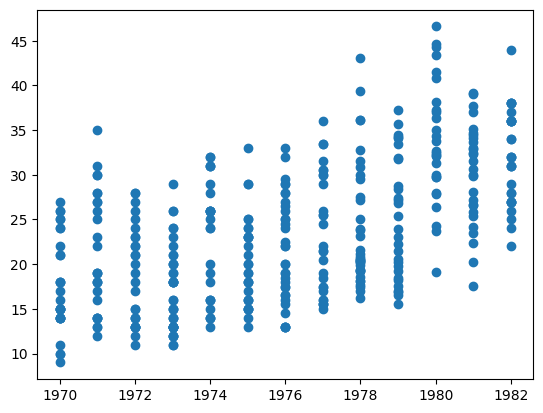

In [18]:
fig,ax = plt.subplots()
X = df['Year']
y = df['mpg']
ax.scatter(X,y)
plt.show()

Visually one can observe a general trend upward in mpg as the years rise, so the newer the car, the more energy efficient it is. We can also observe, that there is a lot of variance in the mpg. Let us group our values into bins and quantify the spread per year. We will use a naive approach instead of using prebuilt modules. Before we do that, let us formalize and quantify the correlation that we see in a function and determine the regression line (also known as the line of best fit).



The correlation coefficient used in numpy is the Pearson correlation coefficient. Numpy uses the least square method to determine the regression line. If you want more information on how to determine the regression line, or would like to know how to do this without external libraries i.e. you are interested in implementing it yourself, then you can take a look at [this](https://www.varsitytutors.com/hotmath/hotmath_help/topics/line-of-best-fit) article by Varsity Tutors where they go over the calculation in depth. 


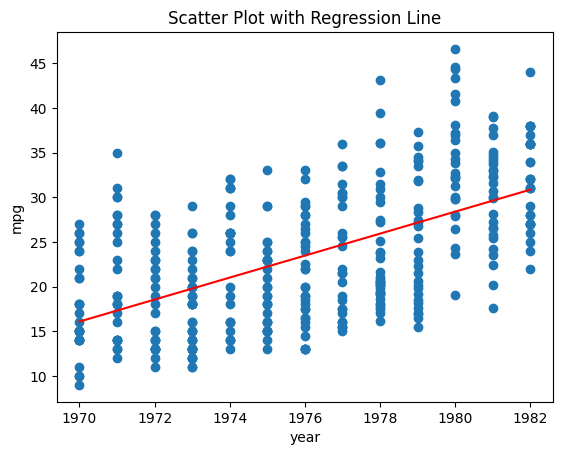

Our correlation coefficient is 0.5805409660907856 . We have a positive correlation between 'mpg' and 'year'.


In [19]:
fig,ax = plt.subplots()
X = df['Year']
y = df['mpg']
ax.scatter(X,y)

corr_coeff = np.corrcoef(X,y)

#The parameter 1 specifies the degree of the polynomial to fit.
slope, intercept = np.polyfit(X,y,1)

regression_line = slope * X + intercept
plt.plot(X, regression_line, color='red', label='Regression_Line')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('year')
plt.ylabel('mpg')
plt.show()
print(f"Our correlation coefficient is {corr_coeff[0][1]} . We have a positive correlation between 'mpg' and 'year'.")

Using gradient descent one can get an even better regression line if possible. Gradient descent is a fundamental algorithm in machine learning, if you would like to learn more about the algorithm and have it explained from a mathematical standpoint, [this](https://medium.com/analytics-vidhya/linear-regression-with-gradient-descent-derivation-c10685ddf0f4) medium article helped me understand it better.

I won't be getting into it in this notebook, I may do so at a later date. What I will demonstrate next, is that one can get the same regression line by using the LinearRegression class in sklearn. In my last notebook, I didn't plot the regression line, I instead plotted the predictions. This isn't necessarily wrong as far as I understand, I just used the model to predict the values, but it may have been a cause of confusion as generally, one may expect some sort of line when the author talks about a linear regression.

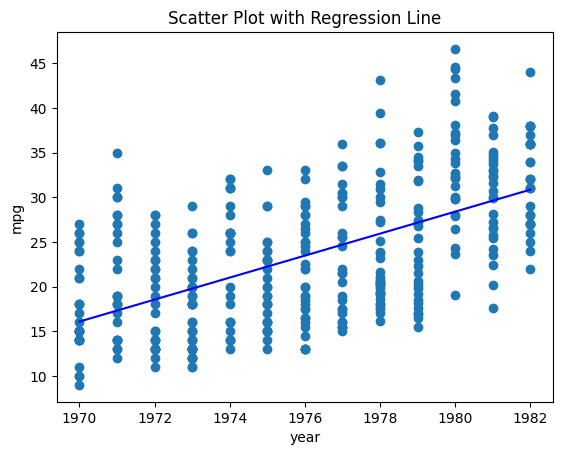

In [20]:
lin_reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train = X_train.values.reshape(-1,1)
lin_reg.fit(X.values.reshape(-1,1), y)
y_pred_lin = lin_reg.predict(X_test.values.reshape(-1,1))

fig,ax = plt.subplots()
ax.scatter(X,y)

slope_2 = lin_reg.coef_
intercept_2 = lin_reg.intercept_
regression_line_2 = intercept_2 + slope_2 * X

plt.plot(X, regression_line_2, color='blue', label='Regression_Line ')


plt.title('Scatter Plot with Regression Line')
plt.xlabel('year')
plt.ylabel('mpg')
plt.show()

One can see that there is a great deal of variance in the miles per gallon that a car would acheive given that it was produced in a certain year. 

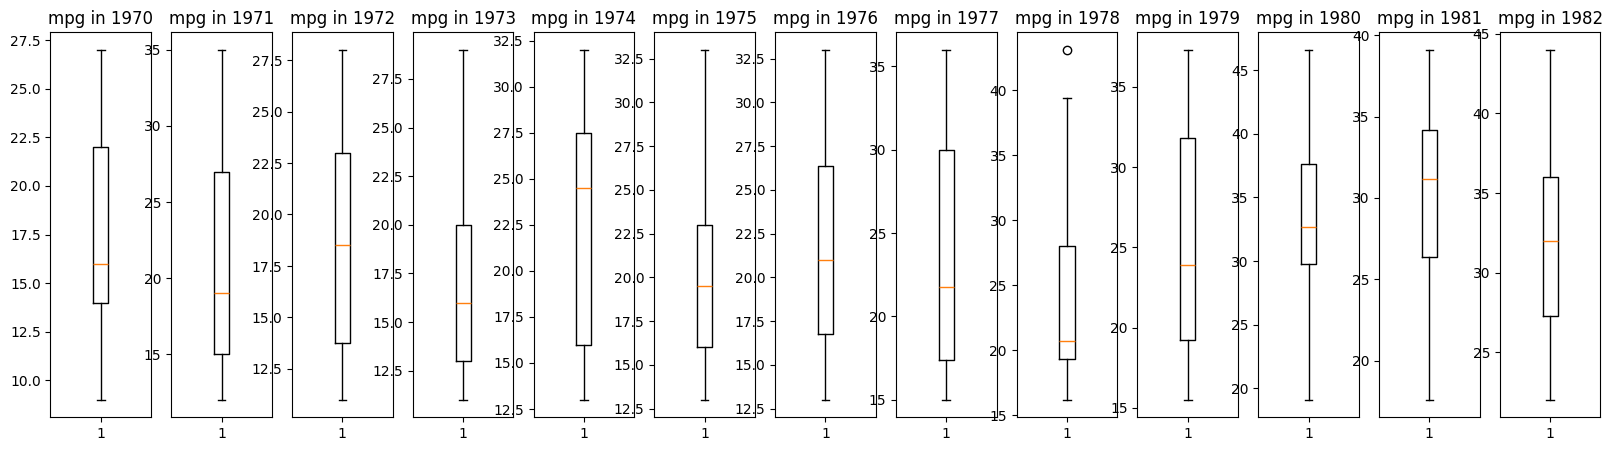

The standard deviations are as follows.
{1970: 5.33923113964563, 1971: 6.675634993324796, 1972: 5.435528819257014, 1973: 4.700245492770319, 1974: 6.537936630513895, 1975: 4.940566303805552, 1976: 5.8892973714537264, 1977: 6.67586171438786, 1978: 6.898044351337259, 1979: 6.794216607552694, 1980: 6.885854032361255, 1981: 5.635319458276115, 1982: 5.232524280385863}


In [21]:
#We can use series.uniques as to quickly count the number of years
unique_years = df['Year'].unique()

fig1, axes = plt.subplots(1,len(unique_years), figsize=(20,5))
#If you want to do something with the index of a list element, or iterable but also need to iterate over the elements themselves 
# use the enumerate function
standard_deviation = dict()
for year_index, year in enumerate(unique_years):
        year_df = df[df['Year']==year]
        standard_deviation[year] = year_df.describe().loc['std','mpg']
        axes[year_index].boxplot(year_df['mpg'])
        #Use an f-string a (formatted literal string) to quickly deal with the multiple titles
        axes[year_index].set_title(f"mpg in {year}")
plt.show()
print("The standard deviations are as follows.")
print(standard_deviation)

In [22]:
max_deviation = max(standard_deviation.values())
min_deviation = min(standard_deviation.values())

#It is smarter to iterate over items, the (key,value) pair, as I need to access both the key and the value 
for key, value in standard_deviation.items():
    if value==max_deviation:
        print(f"The maximum standard deviation was {max_deviation} in the year {key}")
    if value==min_deviation:
        print(f"The minimum standard deviation was {min_deviation} in the year {key}")
    

The minimum standard deviation was 4.700245492770319 in the year 1973
The maximum standard deviation was 6.898044351337259 in the year 1978


We can see that the years with the largest variance in mpg is 1978. The variance is just the square of the standard deviation, so it follows from our calculation.

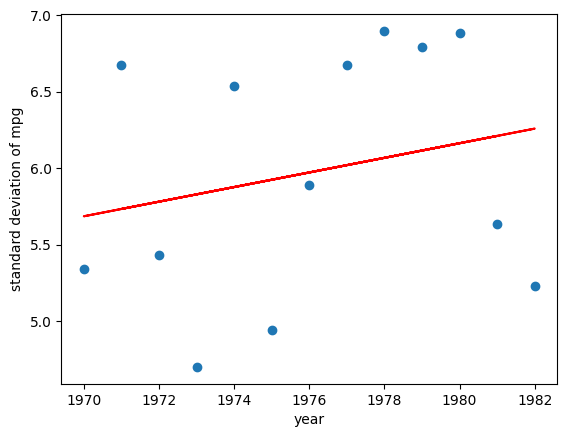

Our correlation coefficient is 0.23207800532484846 . We have a positive correlation between 'standard deviation of mpg' and 'year'.


In [23]:
sorted_deviations = sorted(standard_deviation.items(), key=lambda item: item[1])

fig, ax = plt.subplots()

# I will not lie, I still do not understand why I constantly have to reshape some arrays

X_year_var = np.array([sub_array[0] for sub_array in sorted_deviations]).reshape(-1, 1)
y_year_var = np.array([sub_array[1] for sub_array in sorted_deviations]).reshape(-1, 1)

ax.scatter(X_year_var, y_year_var)
ax.set_xlabel("year")
ax.set_ylabel("standard deviation of mpg")

var_reg = LinearRegression()
var_reg.fit(X_year_var, y_year_var)

var_intercept = var_reg.intercept_
var_slope = var_reg.coef_

#Just as I thought for some reason this method does not work if I reshape the data haha
#Plotting the regression line. 
corr_coef_var = np.corrcoef([sub_array[0] for sub_array in sorted_deviations],[sub_array[1] for sub_array in sorted_deviations])
var_reg_func = var_intercept + var_slope * X_year_var
ax.plot(X_year_var, var_reg_func, color='red', label="Regression Line")
plt.show()

print(f"Our correlation coefficient is {corr_coef_var[0][1]} . We have a positive correlation between 'standard deviation of mpg' and 'year'.")


## Creating the Model

Now that we have gotten a firm grasp on what the data set looks like as well as some correlations and characteristics, we can proceed with creating a model. As discussed in my previous notebook, to create an expressive model, we need to evaluate the model's performance. For this, we need to split the data into training and test subsets. scikit-learn provides a function for this in the model_selection submodule. By default, the split is 3:1. 

Before doing this, we have to define our features (the attributes that we use when making a prediction) and our prediction target. There is generally no way to determine the amount of features that are ideal for a given target variable.

We will let our target variable be mpg and the other columns be our features. Two types of decision trees are used in data analysis, classification trees and regression trees. Regression tree analysis is used when the predicted outcome can be considered a real number. As expanded upon in Russel and Norvig's book "Artificial Intelligence: A Modern Approach": "A regression tree has at each leaf a linear function of some subset of numerical attributes, rather than a single value. For example, the branch for two-
bedroom apartments might end with a linear function o  square footage, numbero  
bathrooms, anthe d average income for the neighbooodrh". /////As we are working witcontinuouste values we will use regressionot Tree.

The final thing that we need to do before we can proceed with creating our model is transfong non-numeric items, in this ca,sthe carun Names antheir originrs into numeric for Creating a mapping from origin to a number is pretty simple as we only have three values, we can thus hard code the mapping. The mapping of names to numbers was a little more involved. We stored the mapped values in origin_id and name_id respectively.d.

In [24]:
df['origin'].unique()

array(['US', 'Asia', 'Europe'], dtype=object)

In [25]:
names = list(df['name'])

name_dict = defaultdict(list)

#We need to classify all the names, my approach is first to populate a dict with the different names,
#then transform it into a list and have our mapping be based on the list index
#I now know a more efficient way to implement this, but I leave that task to you 
#Hint: You can just use the .unique() method
for index, name in enumerate(names):
    name_dict[name].append(index)

#Create new columns
df['name_id'] = 0
df['origin_id'] = 0


fetch_first_elements = lambda arr: [subarr[0] for subarr in arr]

#We used this to get all the car names after classifying them in the first step. 
#This is part of the suboptimal initial approach
name_list = fetch_first_elements(list(name_dict.items()))


#This is the mapping portion
for index in df.index:
    df.loc[index,'name_id'] = name_list.index(df.loc[index,'name'])
    if df.loc[index,'origin'] == 'US':
        df.loc[index,'origin_id'] = 0
    elif df.loc[index,'origin'] == 'Asia':
        df.loc[index,'origin_id'] = 1
    else:
        #For Europe. All entries in our df have an origin, so this is possible
         df.loc[index,'origin_id'] = 2

df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,Year,name_id,origin_id
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu,1970,0,0
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320,1970,1,0
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite,1970,2,0
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst,1970,3,0
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino,1970,4,0


We do a final data formatting step. Dropping the original 'yr' column as we do it need it anymmore.


In [26]:
try:
    df = df.drop("yr", axis=1)
except:
    pass
df.head()

,mpg,cyl,displ,hp,weight,accel,origin,name,Year,name_id,origin_id
0,18.0,8,307.0,130,3504,12.0,US,chevrolet chevelle malibu,1970,0,0
1,15.0,8,350.0,165,3693,11.5,US,buick skylark 320,1970,1,0
2,18.0,8,318.0,150,3436,11.0,US,plymouth satellite,1970,2,0
3,16.0,8,304.0,150,3433,12.0,US,amc rebel sst,1970,3,0
4,17.0,8,302.0,140,3449,10.5,US,ford torino,1970,4,0


We are now ready to create the model. We split the data into training and test sets and then train multiple decision trees with different depths. We then evaluate their performance using the test data based on the mean absolute error of each one. We choose the best-performing model and display it. The decision tree will also be saved in the current folder, as one can zoom in and observe the intricacies better that way. 

The decision tree performs best with a depth of 7
The mean absolute errors of the different depths are: [2.236963445736364, 2.140966420490414, 2.209470738739789, 2.108265866786275, 2.152776967930029]
File 'Decision_Tree.png' already exists


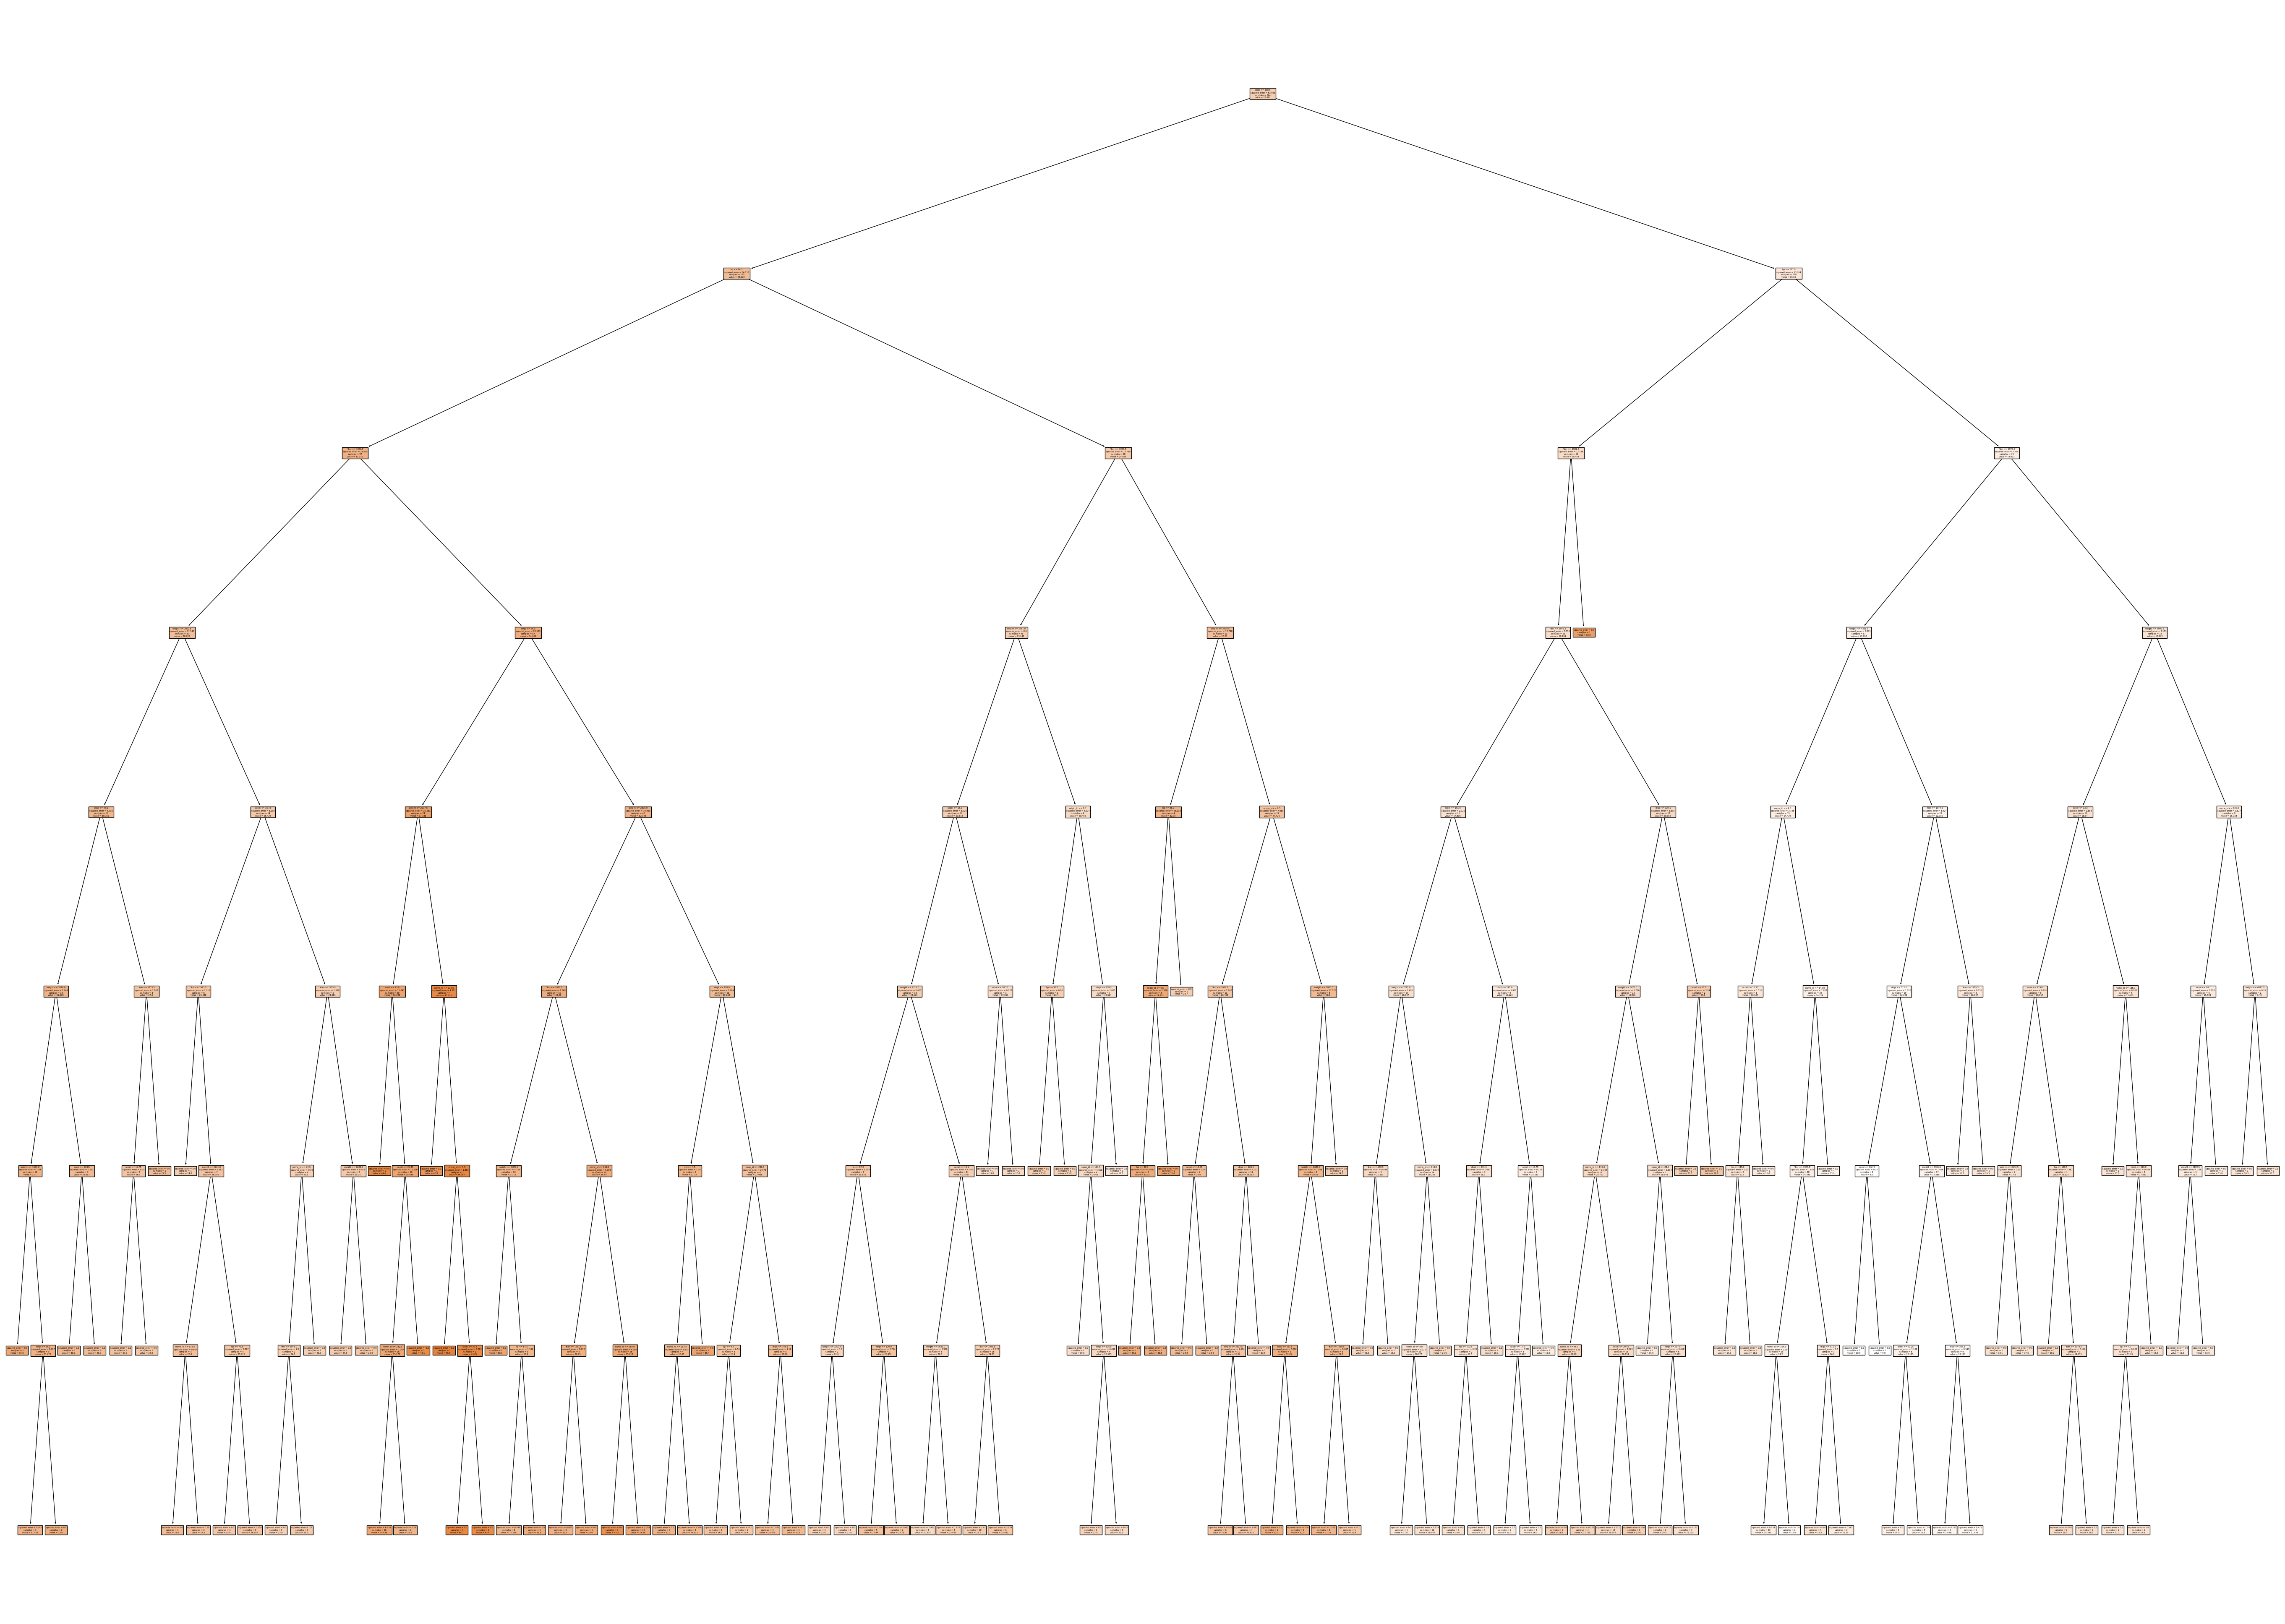

In [27]:

X_1 = df[['cyl', 'displ', 'hp', 'weight', 'accel', 'origin_id', 'name_id',
       'Year']]

X_train, X_test, y_train, y_test = train_test_split(X_1,y,random_state=42)

# We select a couple of depths to test.
# As far as I understand, it doesn't make any sense to have a higher depth than we have features
depths = [4, 5, 6, 7, 8]

# Training decision trees with different depths and evaluating performance
mean_abs_errors = []
for depth in depths:
    mpg_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    mpg_model.fit(X_train, y_train)
    y_prediction = mpg_model.predict(X_test)
    mean_abs_errors.append(mean_absolute_error(y_test, y_prediction))

# Find the best depth based on mean absolute errors
best_depth = depths[mean_abs_errors.index(min(mean_abs_errors))]

print(f"The decision tree performs best with a depth of {best_depth}")
print(f"The mean absolute errors of the different depths are: {mean_abs_errors}")

# Plotting the decision tree
fig, ax = plt.subplots(figsize=(70, 50))
tree.plot_tree(mpg_model, ax=ax, filled=True, feature_names=list(X_1.columns))  

# Saving the plot if it doesn't already exist
if not os.path.exists("Decision_Tree.png"):
    plt.savefig("Decision_Tree.png")
    print("Decision tree visualization saved as 'Decision_Tree.png'")
else:
    print("File 'Decision_Tree.png' already exists")

plt.show()


## Final Outlook and areas for improvement.

Overall I am quite satisfied with what I was able to create, I had a lot of fun going through this modeling process and learning new modules as well as sharpening my skills when it comes to known ones. I think that similar model quality could have been reached with fewer features in hindsight, to achieve this, I think that I should have first examined if there is a correlation between the other variables and mpg, if the correlation is minor in comparison to the others, then it would be fair to assume that these do not bring us that much more information when our goal is calculating the mpg. I am also a little disappointed in the depth of the tree, we are bordering on overfitting as we have 8 possible features, and we use 7 in our decision tree. The biggest improvement that I think I could make on my next go is using a random forest as my model. 